# Урок 5. Проверка статистических гипотез. P-значения. Доверительные интервалы. A/B-тестирование

## Выполнил - Цейко Р.А.

# Задание

**Задача 1**

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

**Задача 2**

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их веса распределены нормально.
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
2. Найдите P-значение для данного теста.

**Задача 3**

Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ]

Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

In [31]:
import numpy as np
from scipy import stats
import math

### **Задача 1**

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

## *Решение*

Среднеквадратичное отклонение генеральной совокупности $\sigma = 16$

Величина выборки $n = 256$

Выборочное среднее $\overline{X} = 80$

Доверительная вероятность $0,95$, откуда $\alpha = 0,05$

Поскольку распределение нормальное, то

In [32]:
stats.norm.ppf(0.05 / 2)

-1.9599639845400545

In [33]:
stats.norm.ppf(1 - 0.05 / 2)

1.959963984540054

$$t_{\alpha/2} = -1,96$$$$t_{1-\alpha/2} = 1,96$$
$$
P \left(
    \overline{X} - t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}}
    \leq a \leq 
    \overline{X} + t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}}
\right)
$$
$$t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} = 1,96 \cdot \dfrac{16}{\sqrt{256}} = 1,96 \cdot \dfrac{16}{16} = 1,96$$
$$
P \left(
    \overline{X} - t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}}
    \leq a \leq 
    \overline{X} + t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}}
\right)
= P \left(80 - 1,96 \leq a \leq 80 + 1,96 \right)
= P \left(78,04 \leq a \leq 81,96 \right)
$$
Доверительный интервал$$P \left(78,04 \leq a \leq 81,96 \right)$$

### **Задача 2**

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их  веса распределены нормально.

Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
Найдите P-значение для данного теста.

## *Решение*

In [34]:
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])


Поскольку в задаче не указано, что распределение нормальное, то используем стьюдента.

Нулевая гипотеза заключается в том, что математическое ожидание равно  μ=200
Статистика:

In [35]:
n = samples.shape[0]
mean = samples.mean()
std = samples.std(ddof=1)

n, mean, std

(10, 198.5, 4.453463071962462)

$$T(X) = \dfrac{\overline{X} - 200}{4,4535 / \sqrt{10}}$$
Уровень значимости $\alpha = 0,01$ для двухсторонней критической области $\Omega_\alpha = (-\infty, t_{\alpha/2}) \cup (t_{1 - \alpha/2}, \infty)$
Определяем критическую область $\Omega_\alpha$

In [36]:
alpha = 0.01
t_l = stats.t.ppf(alpha / 2, df=n - 1)
t_r = stats.t.ppf(1 - alpha / 2, df=n - 1)
t_l, t_r

(-3.24983554401537, 3.2498355440153697)


$\Omega_\alpha = (-\infty; -3,2498) \cup (3,2498; \infty)$
Проводим статистический тест
$$T(X) = \dfrac{198,5 - 200}{4,4535 / \sqrt{10}}$$

In [37]:
T_x = math.sqrt(n) * (mean - 200) / std
T_x

-1.0651074037450896

$$T(X) = -1,0651$$


-3,2498 &lt; T(X) = −1,0651 &lt; 3,2498 

В принципе можно утверждать, что продавец не врет, данные нулевой гипотезе не противоречат.

Теперь давайте найдём P-значение. Для двухсторонней области оно равно
$$P = 2 \cdot \min (P_l, P_r),$$
где $P_l = F_t(t)$, $P_r = 1 - F_t(t)$, а $F_t(x)$ — функция распределения нашей статистики. В нашем случае это t-распределение. Итак,

In [38]:
p_left = stats.t.cdf(T_x, df=n - 1)
p_right = 1 - stats.t.cdf(T_x, df=n - 1)

pvalue = 2 * min(p_left, p_right)

p_left, p_right, pvalue

(0.15728330176236427, 0.8427166982376357, 0.31456660352472854)

P-значение можно интерпретировать так: если уровень значимости меньше P-значения, то нулевую гипотезу можно принять. Видим, что в нашем случае это так.

### **Задача 3**

Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ]

Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

## *Решение*

__Решение__

Итак, проверяем гипотезу о том, что дисперсия равна $\sigma ^ 2 = 0.0625$. Для этого рассматриваем статистику
$$H = (n - 1) \cdot \dfrac{\sigma_X ^ 2}{\sigma ^ 2}$$

В предположении верности нулевой гипотезы эта статистика имеет распределение $\chi ^ 2$ с параметром $df = n - 1$.

In [39]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
                    1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                    0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ])

In [40]:
n = samples.shape[0]
sample_variance = samples.var(ddof=1)

n, sample_variance

(24, 0.07804495041666669)

Для уровня значимости $\alpha = 0.05$ найдём границы критической области:

In [41]:
alpha = 0.05

t1 = stats.chi2.ppf(alpha / 2, df=n - 1)
t2 = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(11.688551922452438, 38.0756272503558)

Итак, критическая область в нашем случае:
$$\Omega_\alpha = \left( -\infty, 11.6886 \right) \cup \left( 38.0756, \infty \right)$$

In [42]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

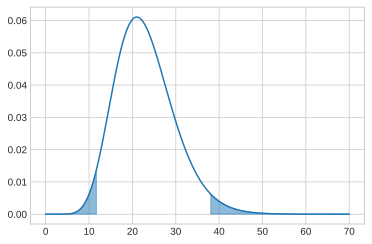

In [43]:
ox = np.linspace(0, 70, 500)
oy = stats.chi2.pdf(ox, df=n - 1)

ox_left = np.linspace(0, t1, 100)
oy_left = stats.chi2.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 70, 100)
oy_right = stats.chi2.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Вычисляем значение статистики и проводим тест:

In [44]:
variance = 0.0625

H = (n - 1) * sample_variance / variance
H

28.720541753333343

Значение не попало в критическую область, гипотезу принимаем.